In [1]:
import numpy as np
import pandas as pd

# Plotting library
import matplotlib.pyplot as plt

# Preprocessing functions
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# ML functions
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
data = pd.read_csv('data/Absenteeism_at_work_AAA/Absenteeism_at_work.csv',
                   header=0,delimiter=";")
print("Size of the data: ", data.shape)

Size of the data:  (740, 21)


In [3]:
# Convert the pandas to numpy
data = np.array(data)
data_X = data[:,:-1]
data_Y = data[:,-1]
n_feature = data_X.shape[1]
print("number of features: ", n_feature)

# Generate Train/Test data
X_train, X_test, y_train, y_test = train_test_split(
       data_X, data_Y, test_size=0.33, random_state=0)

number of features:  20


In [4]:
# Let's do some normalization
scaler = preprocessing.StandardScaler().fit(X_train)
# The same scaling 'object' applied to both train/test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Let's add some noise
n_train = X_train.shape[0]
n_test = X_test.shape[0]
# Prepare the data
k_nn = 20
np.random.seed(0)
# number of noisy features we add to the original features
k_noise_list = [0, 20, 40, 80, 160]
train_X_list = [X_train]
test_X_list = [X_test]
for k in k_noise_list[1:]:
    # add noisy columns to train data
    X_train_noise = np.random.normal(0,1,[n_train,k])
    X_train_new = np.concatenate((X_train, X_train_noise), axis=1)
    train_X_list.append(X_train_new)

    # add noisy columns to test data
    X_test_noise = np.random.normal(0,1,[n_test,k])
    X_test_new = np.concatenate((X_test, X_test_noise), axis=1)
    test_X_list.append(X_test_new)

In [6]:
# Train the model
err_list_train = np.zeros([4,len(k_noise_list)])
err_list_test = np.zeros([4,len(k_noise_list)])
for i in range(len(k_noise_list)):
    # load data
    X_train = train_X_list[i]
    X_test = test_X_list[i]
    
    # k_nn
    k_nn_model = KNeighborsRegressor(n_neighbors=20)
    k_nn_model.fit(X_train, y_train)
    err_list_train[0,i] = np.mean((k_nn_model.predict(X_train)-y_train)**2)
    err_list_test[0,i] = np.mean((k_nn_model.predict(X_test)-y_test)**2)
    
    # decision tree
    DT_model = DecisionTreeRegressor(random_state=0)
    DT_model.fit(X_train, y_train)
    err_list_train[1,i] = np.mean((DT_model.predict(X_train)-y_train)**2)
    err_list_test[1,i] = np.mean((DT_model.predict(X_test)-y_test)**2)
    
    # random forest
    RF_model = RandomForestRegressor(n_estimators=10)
    RF_model.fit(X_train, y_train)
    err_list_train[2,i] = np.mean((RF_model.predict(X_train)-y_train)**2)
    err_list_test[2,i] = np.mean((RF_model.predict(X_test)-y_test)**2)
    
    # random forest
    Bst_model = GradientBoostingRegressor(n_estimators=10)
    Bst_model.fit(X_train, y_train)
    err_list_train[3,i] = np.mean((Bst_model.predict(X_train)-y_train)**2)
    err_list_test[3,i] = np.mean((Bst_model.predict(X_test)-y_test)**2)

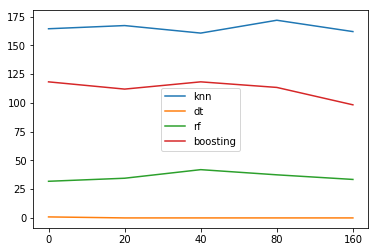

In [7]:
# Plot the error: importance of doing normalization
fig = plt.figure()
plt.plot(err_list_train[0,:], label='knn')
plt.plot(err_list_train[1,:], label='dt')
plt.plot(err_list_train[2,:], label='rf')
plt.plot(err_list_train[3,:], label='boosting')
plt.legend()
plt.xticks(list(range(len(k_noise_list))), k_noise_list)
plt.show()

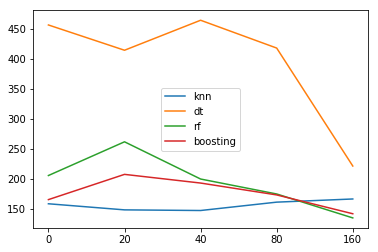

In [8]:
# Plot the error: importance of doing normalization
fig = plt.figure()
plt.plot(err_list_test[0,:], label='knn')
plt.plot(err_list_test[1,:], label='dt')
plt.plot(err_list_test[2,:], label='rf')
plt.plot(err_list_test[3,:], label='boosting')
plt.legend()
plt.xticks(list(range(len(k_noise_list))), k_noise_list)
plt.show()